# Predicting the Energy Output of wind turbine based on weather conditions 

# Importing Libraries 

In [22]:
import pandas as pd
import numpy as np

# Importing data

In [23]:
data=pd.read_csv(r"wind_final.csv", encoding="latin1")

In [24]:
data


,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Weather Condition,Energy (j)
0,5.311336,416.328908,259.994904,Rainy,380.047790
1,5.672167,519.917511,268.641113,Sunny,453.769196
2,5.216037,390.900016,272.564789,Windy,306.376587
3,5.659674,516.127569,271.258087,Cloudy,419.645904
4,5.577941,491.702972,265.674286,Rainy,380.650696
...,...,...,...,...,...
2994,4.763077,279.857583,232.403793,Cloudy,312.653015
2995,5.726370,536.538342,233.743607,Sunny,502.952911
2996,6.115010,663.477396,236.266998,Windy,618.209412
2997,7.861135,1451.505556,240.582901,Cloudy,1313.041016


In [25]:
data.head()

,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Weather Condition,Energy (j)
0,5.311336,416.328908,259.994904,Rainy,380.047790
1,5.672167,519.917511,268.641113,Sunny,453.769196
2,5.216037,390.900016,272.564789,Windy,306.376587
3,5.659674,516.127569,271.258087,Cloudy,419.645904
4,5.577941,491.702972,265.674286,Rainy,380.650696


In [26]:
type(data)

pandas.core.frame.DataFrame

In [27]:
data.tail()

,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Weather Condition,Energy (j)
2994,4.763077,279.857583,232.403793,Cloudy,312.653015
2995,5.726370,536.538342,233.743607,Sunny,502.952911
2996,6.115010,663.477396,236.266998,Windy,618.209412
2997,7.861135,1451.505556,240.582901,Cloudy,1313.041016
2998,8.012542,1537.187031,237.528305,Rainy,1419.578979


In [28]:
data['Weather Condition'].unique()

array(['Rainy', 'Sunny', 'Windy', 'Cloudy'], dtype=object)

In [29]:
data['Weather Condition'].value_counts()

Rainy     943
Windy     697
Cloudy    696
Sunny     663
Name: Weather Condition, dtype: int64

In [30]:
data.describe()

,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Energy (j)
count,2999.000000,2999.000000,2999.000000,2999.000000
mean,10.226426,2269.774691,186.755545,2100.311244
std,4.198827,1349.155338,62.025169,1322.877747
min,2.999369,0.000000,0.290497,-0.959000
25%,6.601098,846.107331,188.643700,753.367188
50%,10.079380,2840.478799,203.157806,2327.511963
75%,13.137850,3600.000000,218.586395,3463.225952
max,22.245371,3600.000000,358.189789,3605.758057


In [31]:
data.shape

(2999, 5)

# Dataprocessing 

In [32]:
# checking missing values
data.isnull().any()

Wind Speed (m/s)                 False
Theoretical_Power_Curve (KWh)    False
Wind Direction (°)               False
Weather Condition                False
Energy (j)                       False
dtype: bool

#  Label encoder

In [37]:

from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data["Weather Condition"]=l.fit_transform(data["Weather Condition"])

In [38]:
data

,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Weather Condition,Energy (j)
0,5.311336,416.328908,259.994904,1,380.047790
1,5.672167,519.917511,268.641113,2,453.769196
2,5.216037,390.900016,272.564789,3,306.376587
3,5.659674,516.127569,271.258087,0,419.645904
4,5.577941,491.702972,265.674286,1,380.650696
...,...,...,...,...,...
2994,4.763077,279.857583,232.403793,0,312.653015
2995,5.726370,536.538342,233.743607,2,502.952911
2996,6.115010,663.477396,236.266998,3,618.209412
2997,7.861135,1451.505556,240.582901,0,1313.041016


# Spilting of data

In [39]:
x=data.iloc[:,0:4].values
y=data.iloc[:,4:5].values

In [40]:
x

array([[5.31133604e+00, 4.16328908e+02, 2.59994904e+02, 1.00000000e+00],
       [5.67216682e+00, 5.19917511e+02, 2.68641113e+02, 2.00000000e+00],
       [5.21603680e+00, 3.90900016e+02, 2.72564789e+02, 3.00000000e+00],
       ...,
       [6.11500978e+00, 6.63477396e+02, 2.36266998e+02, 3.00000000e+00],
       [7.86113501e+00, 1.45150556e+03, 2.40582901e+02, 0.00000000e+00],
       [8.01254177e+00, 1.53718703e+03, 2.37528305e+02, 1.00000000e+00]])

In [41]:
y

array([[ 380.0477905],
       [ 453.7691956],
       [ 306.3765869],
       ...,
       [ 618.2094116],
       [1313.041016 ],
       [1419.578979 ]])

In [42]:
x.shape

(2999, 4)

# one hot encoder

In [43]:

from sklearn.preprocessing import OneHotEncoder
o= OneHotEncoder()
z=o.fit_transform(x[:,3:4]).toarray()

In [44]:
z

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [45]:
z.shape

(2999, 4)

In [46]:
x=np.delete(x,3,axis=1)
x=np.concatenate((z,x),axis=1)

In [47]:
x.shape

(2999, 7)

In [48]:
y.shape

(2999, 1)

# Training the sets 

In [49]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [50]:
x_train.shape

(2399, 7)

In [51]:
y_train.shape

(2399, 1)

In [52]:
x_test.shape

(600, 7)

In [53]:
y_test.shape

(600, 1)

# Multilinear Regression

In [54]:

from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
y_pred=mlr.predict(x_test)

In [56]:
y_test

array([[1.12271204e+03],
       [2.53152599e+01],
       [3.46144605e+03],
       [3.11782910e+03],
       [2.64232910e+03],
       [3.46163696e+03],
       [3.49770996e+03],
       [3.43971289e+03],
       [3.17866699e+03],
       [1.04310901e+03],
       [3.60289600e+03],
       [7.91083618e+02],
       [1.12110901e+02],
       [1.86561902e+03],
       [3.51487207e+03],
       [1.04142102e+03],
       [1.93958496e+03],
       [4.87211792e+02],
       [1.49169898e+03],
       [4.94593689e+02],
       [3.51629712e+03],
       [3.48160004e+02],
       [3.70779602e+02],
       [8.12088013e+02],
       [3.50667505e+03],
       [1.58148303e+03],
       [2.07345190e+03],
       [4.12115509e+02],
       [1.21492102e+03],
       [1.22060901e+03],
       [3.43928198e+03],
       [3.46132007e+03],
       [1.47649805e+03],
       [1.02877403e+02],
       [3.66112488e+02],
       [3.47610205e+03],
       [1.16489294e+03],
       [9.66777100e+02],
       [3.59742993e+03],
       [3.52859106e+03],


In [57]:
from sklearn.metrics import r2_score
acc=r2_score(y_test,y_pred)

In [58]:
acc

0.884756430778436

In [59]:
pred=mlr.predict([[0,0,1,0,5.6,600,300]])

In [60]:
pred

array([[863.76401372]])

# Decision Tree Regression

In [61]:

from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=0)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [62]:
dtrpre=dtr.predict(x_test)

In [63]:
dtrpre

array([1.09905200e+03, 6.34867210e+01, 3.46234106e+03, 3.12550098e+03,
       2.59022290e+03, 3.46200293e+03, 3.60310303e+03, 3.42180005e+03,
       3.39171606e+03, 9.28654297e+02, 3.59772510e+03, 5.62244080e+02,
       1.09579697e+02, 1.81383496e+03, 3.54002100e+03, 1.10592102e+03,
       2.06962500e+03, 5.85259399e+02, 1.21927405e+03, 4.36324402e+02,
       3.47444507e+03, 2.55903702e+02, 3.31719299e+02, 7.73644226e+02,
       3.47940796e+03, 1.25413794e+03, 2.13351099e+03, 4.20522492e+02,
       1.15517395e+03, 1.28982605e+03, 3.23323511e+03, 3.46143799e+03,
       1.55805798e+03, 9.85592270e+01, 2.48442902e+02, 3.51209595e+03,
       1.00095398e+03, 3.40108105e+03, 3.60433203e+03, 3.60369190e+03,
       1.51435901e+03, 8.17464416e+02, 8.04282288e+02, 4.65753601e+02,
       1.09579697e+02, 3.60285010e+03, 9.29407410e+02, 3.27324609e+03,
       3.53026294e+03, 1.00973700e+03, 2.87205908e+03, 2.70774292e+03,
       3.27365601e+03, 7.06634399e+02, 3.29316699e+03, 6.55730713e+02,
      

In [64]:
y_test

array([[1.12271204e+03],
       [2.53152599e+01],
       [3.46144605e+03],
       [3.11782910e+03],
       [2.64232910e+03],
       [3.46163696e+03],
       [3.49770996e+03],
       [3.43971289e+03],
       [3.17866699e+03],
       [1.04310901e+03],
       [3.60289600e+03],
       [7.91083618e+02],
       [1.12110901e+02],
       [1.86561902e+03],
       [3.51487207e+03],
       [1.04142102e+03],
       [1.93958496e+03],
       [4.87211792e+02],
       [1.49169898e+03],
       [4.94593689e+02],
       [3.51629712e+03],
       [3.48160004e+02],
       [3.70779602e+02],
       [8.12088013e+02],
       [3.50667505e+03],
       [1.58148303e+03],
       [2.07345190e+03],
       [4.12115509e+02],
       [1.21492102e+03],
       [1.22060901e+03],
       [3.43928198e+03],
       [3.46132007e+03],
       [1.47649805e+03],
       [1.02877403e+02],
       [3.66112488e+02],
       [3.47610205e+03],
       [1.16489294e+03],
       [9.66777100e+02],
       [3.59742993e+03],
       [3.52859106e+03],


In [65]:
from sklearn.metrics import r2_score
a=r2_score(y_test,dtrpre)

In [66]:
a

0.9486848926722369

In [67]:
dtpred=dtr.predict([[0,1,0,0,6.8,800,100]])

In [68]:
dtpred

array([811.3214111])

# random forest regression


In [69]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=10,random_state=0)
rfr.fit(x_train,y_train)

E:\Users\vinay\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [70]:
import pickle
pickle.dump(rfr,open('Energy1.pkl','wb'))

In [71]:
rfrpre=rfr.predict(x_test)

In [72]:
rfrpre

array([1110.79394536,   38.07597246, 3529.8108155 , 3050.4450931 ,
       2756.9721436 , 3462.1897459 , 3547.7207766 , 3184.3951662 ,
       3375.8514647 , 1037.78421643, 3600.891211  ,  638.58527221,
        109.54010543, 1730.0310789 , 3570.4730712 , 1203.318518  ,
       1971.864392  ,  502.80843812, 1386.5888063 ,  480.89708862,
       3481.5254883 ,  248.0415329 ,  360.58599547,  862.12113037,
       3583.7970944 , 1466.3651976 , 2103.1431399 ,  436.31113892,
       1178.2481812 , 1269.9043336 , 3290.6293211 , 3504.1523924 ,
       1377.0422851 ,   94.93809967,  322.10919494, 3474.2473632 ,
       1001.00588371, 3443.7933351 , 3603.0954101 , 3565.6132814 ,
       1532.4032228 ,  729.37372741,  760.95444948,  436.73619079,
        114.58019178, 3526.7947021 , 1019.77546373, 3242.5131106 ,
       3530.6275633 , 1023.7883667 , 2886.1816894 , 2658.5111328 ,
       3127.4698243 , 1616.97419737, 3303.9802978 ,  644.68232425,
        199.91929017, 3259.7558838 , 3260.2032226 , 2230.51948

In [73]:
y_test

array([[1.12271204e+03],
       [2.53152599e+01],
       [3.46144605e+03],
       [3.11782910e+03],
       [2.64232910e+03],
       [3.46163696e+03],
       [3.49770996e+03],
       [3.43971289e+03],
       [3.17866699e+03],
       [1.04310901e+03],
       [3.60289600e+03],
       [7.91083618e+02],
       [1.12110901e+02],
       [1.86561902e+03],
       [3.51487207e+03],
       [1.04142102e+03],
       [1.93958496e+03],
       [4.87211792e+02],
       [1.49169898e+03],
       [4.94593689e+02],
       [3.51629712e+03],
       [3.48160004e+02],
       [3.70779602e+02],
       [8.12088013e+02],
       [3.50667505e+03],
       [1.58148303e+03],
       [2.07345190e+03],
       [4.12115509e+02],
       [1.21492102e+03],
       [1.22060901e+03],
       [3.43928198e+03],
       [3.46132007e+03],
       [1.47649805e+03],
       [1.02877403e+02],
       [3.66112488e+02],
       [3.47610205e+03],
       [1.16489294e+03],
       [9.66777100e+02],
       [3.59742993e+03],
       [3.52859106e+03],


In [74]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,rfrpre)

In [75]:
accuracy

0.9597286179758082

In [76]:
rfrpred=rfr.predict([[1,0,0,0,2.4,900,600]])

In [77]:
rfrpred

array([517.95548936])

# polynomial regression

In [78]:
from sklearn .preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x)

In [79]:
x

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        5.31133604e+00, 4.16328908e+02, 2.59994904e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        5.67216682e+00, 5.19917511e+02, 2.68641113e+02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.21603680e+00, 3.90900016e+02, 2.72564789e+02],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.11500978e+00, 6.63477396e+02, 2.36266998e+02],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.86113501e+00, 1.45150556e+03, 2.40582901e+02],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        8.01254177e+00, 1.53718703e+03, 2.37528305e+02]])

In [80]:
x_poly

array([[1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.17166324e+10, 7.31696660e+09, 4.56940171e+09],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.95080494e+10, 1.00797992e+10, 5.20822712e+09],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.13519607e+10, 7.91543780e+09, 5.51923650e+09],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.45730118e+10, 8.75054943e+09, 3.11610623e+09],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.21945820e+11, 2.02121715e+10, 3.35010971e+09],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.33316580e+11, 2.06002657e+10, 3.18318207e+09]])

In [87]:
poly_reg.fit(x_poly,y)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                   order='C')

In [88]:
poly=LinearRegression()
poly.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
polypred = poly.predict(x_poly)

In [90]:
polypred

array([[ 415.13038044],
       [ 534.37719337],
       [ 341.08292353],
       ...,
       [ 644.18287329],
       [1411.54839605],
       [1403.04333761]])

In [91]:
polyacc = r2_score(y,polypred)

In [92]:
polyacc

0.9558426768215417

# Feature scaling


In [95]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x_train=s.fit_transform(x_train)
x_test=s.fit_transform(x_test)

# Data Visualisation

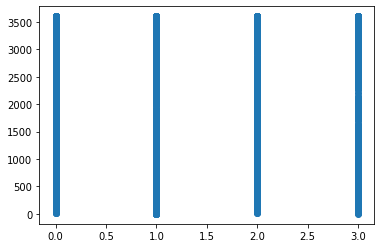

In [96]:
import matplotlib.pyplot as plt
plt.scatter(data["Weather Condition"],data["Energy (j)"])

In [97]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


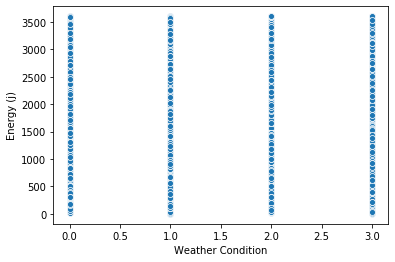

In [98]:
sns.scatterplot(x = "Weather Condition", y = "Energy (j)", data = data)

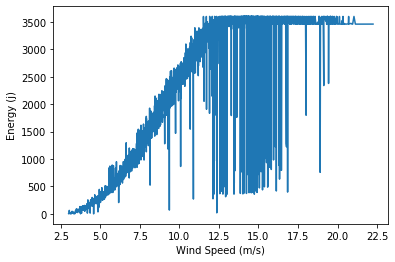

In [99]:
sns.lineplot(x="Wind Speed (m/s)",y="Energy (j)",data =data)


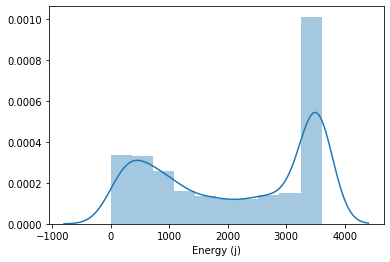

In [100]:
sns.distplot(data['Energy (j)'])

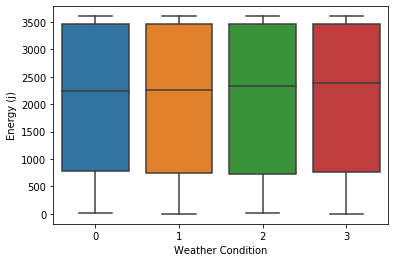

In [101]:
sns.boxplot(x="Weather Condition",y="Energy (j)",data = data)

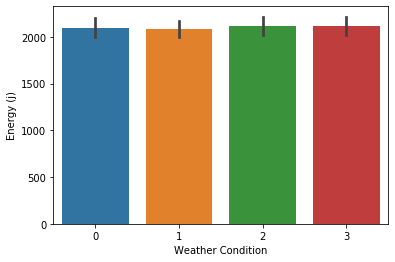

In [102]:
sns.barplot(x = "Weather Condition",y="Energy (j)",data = data)

In [103]:
data.corr()

,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Weather Condition,Energy (j)
Wind Speed (m/s),1.000000,0.912565,0.093140,0.000633,0.862238
Theoretical_Power_Curve (KWh),0.912565,1.000000,0.100838,0.004014,0.937104
Wind Direction (°),0.093140,0.100838,1.000000,0.001641,0.203448
Weather Condition,0.000633,0.004014,0.001641,1.000000,0.007150
Energy (j),0.862238,0.937104,0.203448,0.007150,1.000000


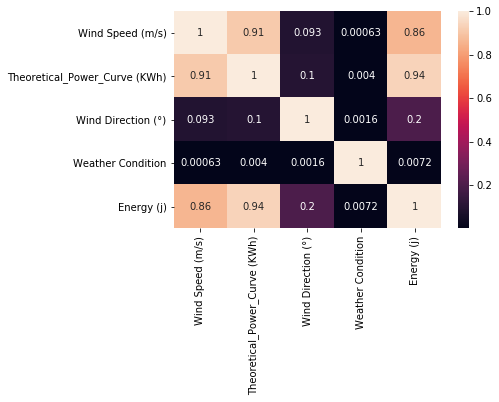

In [104]:
sns.heatmap(data.corr(),annot = True )